\setcounter{secnumdepth}{0}

# Assignment 5 - Topic of assignment

    Name: Clara Periago Serrano
    Student #: s1067476

In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import jax.random as jr

# Exercise 1: Controlled Lotka-Volterra

## Exercise 1.1
Create a stochastic Lotka-Volterra system that is solved using the Euler-Maruyama method. For the parameters, you can use: 
$ \alpha = 1.1, \beta = 0.4, \delta = 0.1, \gamma =0.4$ with an initial condition of $\mathbf{x}_0 = (10,10)^\top$. For the Brownian motion, you can use $\sigma = 0.05$, multiplied with the state (this is called multiplicative noise). Make sure that your step size is small enough, and the duration of the system is sufficiently long for showing the long term evolution of the system.

## Solution 1.1

(100000, 2)


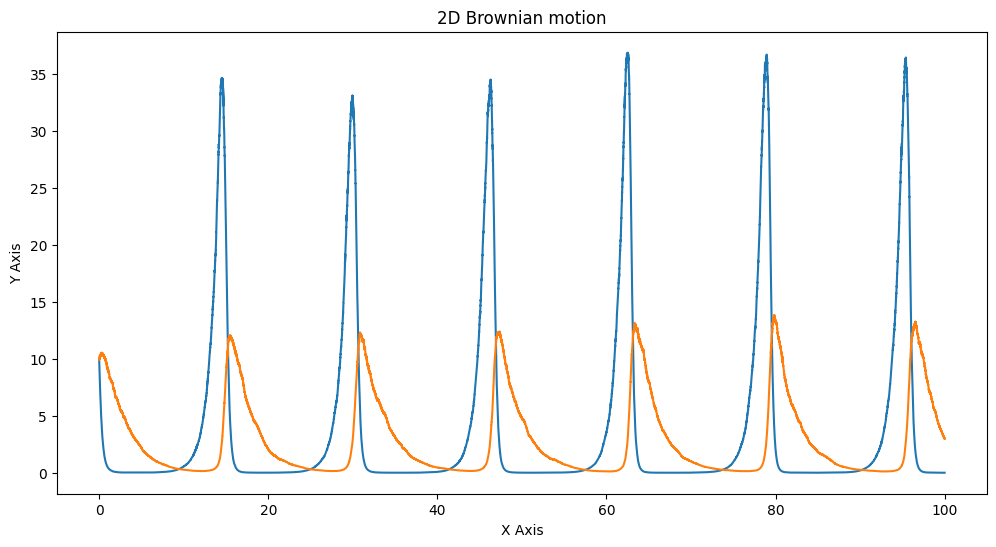

In [ ]:
def euler_maruyama(f, dt): # this is just boilerplate but we can't just use the euler fn from before. since we need also dt here
    @jax.jit
    def step(c, t):
        return f(t, c, dt)
    return step

def simulate(solver, c0, t):
    def iterate(c, t):
        xn1 = solver(c, t)
        return xn1, xn1
    
    _, xs = jax.lax.scan(iterate, c0, t)
    return xs

def lotka_volterra(alpha=1.1, beta=0.4, delta=0.1, gamma=0.4, sigma=0.05): # attractor written as matrix
    @jax.jit
    def _wrap(t, c, dt):
        xx, key = c # here x and v are each 2d vectors!
        (x, y) = xx

        key, subkey = jr.split(key)
        dw = jr.normal(subkey, shape=(2,)) * sigma * xx

        dx = alpha * x - beta * x * y
        dy = delta * x * y - gamma * y

        return xx + dt * jnp.array([dx, dy]) + jnp.sqrt(dt)*dw, key

    return _wrap

dt = 0.001
key = jr.key(42)
t = jnp.arange(0, 100, dt)

lv = lotka_volterra()
lv_solver = euler_maruyama(lv, dt) # solver function for our system & dt
xy0 = jnp.array([10., 10.]) # initial state
xvs, _ = simulate(lv_solver, (xy0, key), t) # iterate over the t space

print(xvs.shape)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(t, xvs[:, 0], label="x")
ax.plot(t, xvs[:, 1], label="y")
ax.set_title("2D Brownian motion")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis");

In [3]:
jnp.isnan(xvs[:, 0]).sum()

Array(0, dtype=int32)

## Exercise 1.2
Create a control function $u(x)$ that receives the current state as input and returns an action as output. This control function has to be defined in such a way that the system becomes stabilized at the fixed point $\mathbf{x}^*_{\text{equilibrium}} = (\gamma / \delta , \alpha / \beta )^\top$. You are allowed to use this goal state in your definition of the control function.

For the result, show both the system evolution and control input over time, as well as the phase plane trajectory in a second figure. 

Then, explain:

    - your reasoning behind the design of the control function;
    
    - discuss to what extent the system can be controlled to its equilibrium point;

## Solution 1.2

In [ ]:
goal_state = jnp.array([gamma/delta, alpha/beta]) 

# YOUR ANSWER HERE

# Exercise 2: Linear Quadratic Regulator

## Exercise 2.1 

Simulate the completely observed discrete-time stochastic double integrator without control. Use $\sigma_x^2$=0.01.

## Solution 2.1

(100000, 1)


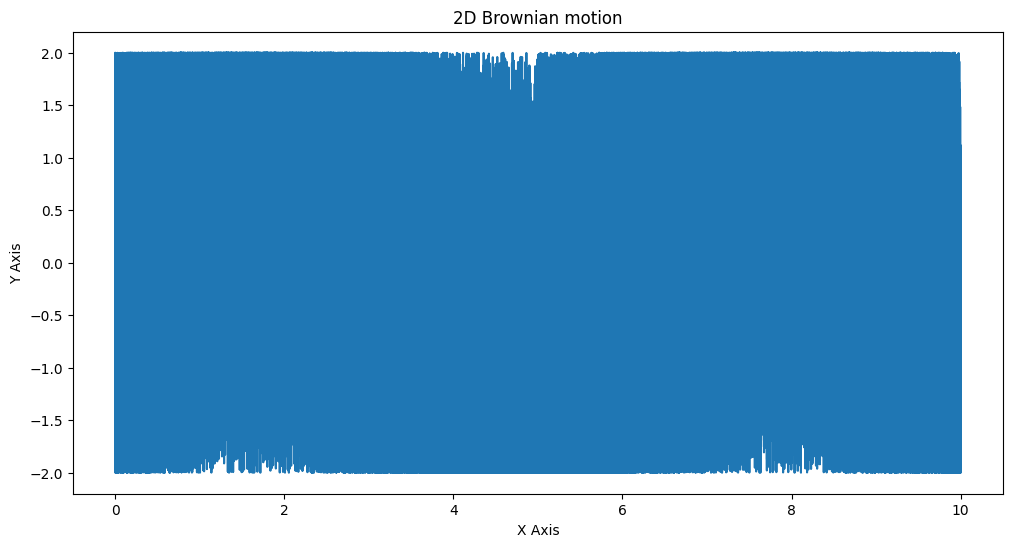

In [11]:
def lqr(m=1., nu=None, sigma=0.01): # attractor written as matrix
    def some_force(t, k):
        rr = jr.normal(k)
        return 2. * jnp.sin(t + rr)

    if nu is None:
        nu = some_force
    @jax.jit
    def _wrap(t, c, dt):
        v, key = c # here x and v are each 2d vectors!

        key, subkey, subsubkey = jr.split(key, 3)
        epsilon = jr.normal(subkey, 1) * sigma * dt

        dv = nu(t, subsubkey) / m

        return dv + epsilon, key

    return _wrap

dt = 0.0001
key = jr.key(42)
t = jnp.arange(0, 10, dt)

lv = lqr()
lv_solver = euler_maruyama(lv, dt) # solver function for our system & dt
xy0 = jnp.array([10.]) # initial state
xvs, _ = simulate(lv_solver, (xy0, key), t) # iterate over the t space

print(xvs.shape)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(t, xvs[:, 0], label="x")
# ax.plot(t, xvs[:, 1], label="y")
ax.set_title("2D Brownian motion")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis");

## Exercise 2.2 

Compute the Linear Quadratic Regulator for the completely observed discrete-time stochastic double integrator. You may use 'scipy.linalg.solve_discrete_are' to compute the S matrix. You can assume that q = r = 0.5.

## Solution 2.2

In [ ]:
## Control theory utilities
from scipy.linalg import solve_discrete_are

class LQR:
    """       
    Discrete time linear quadratic regulator

    state equation:
    x_n+1 = x_n' A x_n + B u_n + e_n with e_n ~ N(0, W)

    cost function
    J = sum_n [x_n' Q x_n + u_n' R u_n]

    """

    def __init__(self, A: jnp.array, B: jnp.array, W: jnp.array, 
                 Q: jnp.array, R: jnp.array) -> None:
        
        self.n_state = A.shape[0]
        self.n_control = B.shape[1]

        self.A = A
        self.B = B
        self.W = W

        self.Q = Q
        self.R = R

        # YOUR ANSWER HERE

    def control(self, x):
        return None # YOUR ANSWER HERE

    def reward(self, x, u):
        return None # YOUR ANSWER HERE
    
lqr = LQR(A, B, W, Q, R)

# YOUR ANSWER HERE

## Exercise 2.3

Compare the reward over time of the LQR controller with no control.

In [ ]:
# YOUR ANSWER HERE

# Exercise 3: Value iteration

Use value iteration to find the optimal control sequence starting in state $s_1$ for the four-state toy problem as discussed in class. Use c1 = 4, c2 = 1, c3 = 1, c4 = 4, c5 = 2, c6 = 7.

In [ ]:
# YOUR ANSWER HERE